# Custom plot style based on seaborn 

Import standard libaries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools
from scipy import constants

Import custom libaries and set plot style

In [2]:
# set custom matplotlib rc file 
url_rcfile = 'https://raw.githubusercontent.com/TheFerry10/ml-parameter-identification/master/seaborn-custom-style.mplstyle'
mpl.style.use(url_rcfile)

# Uncomment the following lines, if you wish to use latex fonts in matplotlib
# figures. The first line installs latex fonts, while the second line activates
# the fonts in the matplotlib rc file

#!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
mpl.rcParams['text.usetex'] = True

In [3]:
class CustomPlotStyle(object):
    def __init__(self, textwidth_in_inches=6.30):
        self.TEXTWIDTH_LATEX = textwidth_in_inches
        self.ASPECT_RATIO = 4/3
        self.SCALE = 1.0
        self.WIDTH = self.SCALE * self.TEXTWIDTH_LATEX
        self.HEIGHT = self.WIDTH / self.ASPECT_RATIO
        self.PALETTE = sns.color_palette(mpl.colors.TABLEAU_COLORS)
        self.MARKERS = ['o', 's', '^', 'v', 'D','P','X','*']
    
    def create_figure(self, width=None, height=None, aspect_ratio=None, width_scale=None):
        if width_scale is None:
            width_scale = self.SCALE
        if width is None:
            width = self.TEXTWIDTH_LATEX * width_scale
        if height is None:
            height = width / self.ASPECT_RATIO
        if aspect_ratio is not None:
            height =  width / aspect_ratio
        fig, ax = plt.subplots(figsize=(width, height), tight_layout=True)
        return fig, ax    
    
    def get_marker_cycle(self):
        return itertools.cycle(self.MARKERS)

    def get_color_cycle(self):
        return itertools.cycle(self.PALETTE)  


def create_label_without_line(label, ax):
    return ax.plot([],[],label=label, linewidth=0, color='k')

def set_figsize(width=6.3, aspect_ratio=4/3, width_scale=1.0):
    width = width * width_scale
    height =  width / aspect_ratio
    return (width, height)    

def save_fig(file_name, output_dir='', dpi=300, file_extensions=['.pdf','.png']):
    file_name = os.path.join(output_dir,file_name)
    for file_extension in file_extensions:
        plt.gcf().savefig(file_name + file_extension, dpi=dpi)
        
        
class PlotLabels(object):
    """Creating plot labels for convenience and use them globally"""
    def __init__(self):
        self.time = r'Time $t$ [s]'  
        self.molarConcentration = r'Concentration $c_m$ [mol/m$^3$]'

In [4]:
def convert_centimeters_to_inches(length_in_centimeters):
    return length_in_centimeters * constants.centi / constants.inch

In [5]:
TEXTWIDTH_IN_CENTIMETERS = 16
plotStyle = CustomPlotStyle(textwidth_in_inches=convert_centimeters_to_inches(TEXTWIDTH_IN_CENTIMETERS))
plotLabels = PlotLabels()
#sns.set_context("talk", font_scale=1.2)

Set input and output directory

In [6]:
INPUT_DIR = 'input-data'
OUTPUT_DIR = 'output-data'

In [7]:
PATH_TO_FIGURES =  os.path.join(OUTPUT_DIR, 'fig/')
if not os.path.isdir(PATH_TO_FIGURES):
    os.mkdir(PATH_TO_FIGURES)

Plot and save an example figure

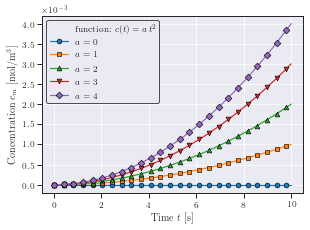

In [8]:
t = np.linspace(0,10)
MARKERS = plotStyle.get_marker_cycle()
fig, ax = plotStyle.create_figure(width_scale=0.7)
create_label_without_line(r'function: $c(t) = a\,t^2$',ax)
[ax.plot(t,coefficient*1e-5*t**2,
         marker=next(MARKERS),
         label=f'$a$ = {coefficient}',markevery=2) \
         for coefficient in np.arange(5)];

ax.legend();
ax.set_xlabel(plotLabels.time)
ax.set_ylabel(plotLabels.molarConcentration)
save_fig(file_name='some-simple-functions', output_dir=PATH_TO_FIGURES, dpi=300, file_extensions=['.eps','.png','.pdf'])

Load the saved image. Note that the output in the Jupyter notebook in the plot above is a resized version of the saved image. 

![title](output-data/fig/some-simple-functions.png)